In [ ]:
from wordcloud import WordCloud
import nltk
import pandas
import matplotlib.pyplot as plt
import spacy
from nltk.stem import PorterStemmer
from string import punctuation
from re import sub
import time

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
!wget http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
!tar -xf MovieSummaries.tar.gz

--2023-03-02 14:15:02--  http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48002242 (46M) [application/x-gzip]
Saving to: ‘MovieSummaries.tar.gz.13’

MovieSummaries.tar. 100%[===================>]  45.78M  4.35MB/s    in 11s     

2023-03-02 14:15:13 (4.27 MB/s) - ‘MovieSummaries.tar.gz.13’ saved [48002242/48002242]



In [ ]:
df_english = pandas.read_csv("/content/MovieSummaries/plot_summaries.txt", delimiter = "\t",names=["id","text"])
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      42303 non-null  int64 
 1   text    42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


In [ ]:
df_english.head()

,id,text
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [ ]:
sentences= [sub(r'[^\w\s]', '', sentence) for sentence in df_english["text"][:1000] ]

# NLTK

In [ ]:
nltk_start = time.time()

In [ ]:
#tokenization
from nltk.tokenize import word_tokenize
en_tokenized = [word_tokenize(sentence) for sentence in sentences]

In [ ]:
#removing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# filtered_sentence = [w for w in en_tokenized if not w.lower() in stop_words]

filtered_sentence=[""]*len(df_english["text"])
for i in range(len(en_tokenized)):
  filtered_sentence[i] = []
  for word in en_tokenized[i]:
    # print(word)
    if word.lower() not in stop_words:
      filtered_sentence[i].append(word)
  # filtered_sentence[i]=([w for w in sentences[i] if not (w.lower() in stop_words)])


In [ ]:
from pandas.core.missing import F
from nltk.stem import *
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
for i in range(len(filtered_sentence)):
  for j in range(len(filtered_sentence[i])):
    filtered_sentence[i][j] = stemmer.stem(filtered_sentence[i][j])
    filtered_sentence[i][j] = lemmatizer.lemmatize(filtered_sentence[i][j])
df_english["NLTK"] = filtered_sentence

In [ ]:
flat = []
for sentence in filtered_sentence:
  flat.extend(sentence)
comment_words = " ".join(flat)+" "
print(len(comment_words))

1122931


In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)

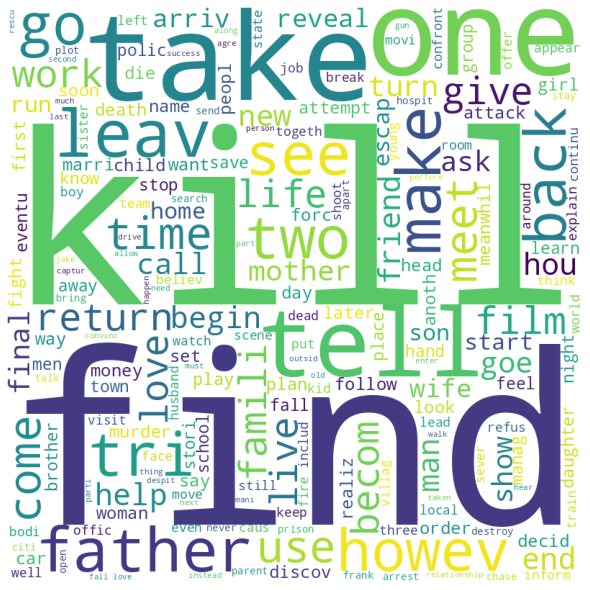

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
nltk_end = time.time()

In [ ]:
print(f"NLTK execution time: {nltk_end-nltk_start}.")

NLTK execution time: 21.733271598815918.


# Spacy

In [ ]:
spacy_start = time.time()

In [ ]:
nlp = spacy.load("en_core_web_sm")
filtered_sentences=[""]*len(df_english["text"])
full=""
for i in range(len(sentences)):
  doc = nlp(
      sentences[i])

  full_text = ''
  for tok in doc:
      if  tok.is_stop:
        continue
      full_text += tok.lemma_ + ' '
  filtered_sentences[i]=(full_text)
  full += full_text + " "
df_english["SpaCy"] = filtered_sentences


In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(full)

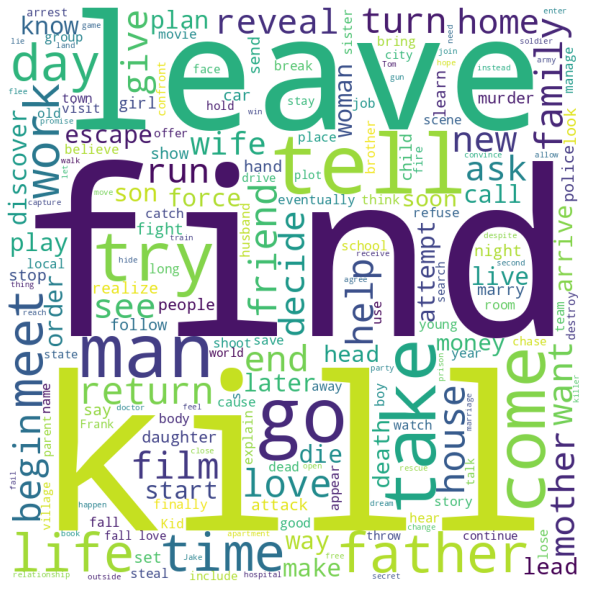

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
spacy_end = time.time()

In [ ]:
print(f"Spacy execution time: {spacy_end-spacy_start}.")

Spacy execution time: 76.91761445999146.


In [ ]:
df_english.to_csv("session02_en.csv")